<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter7/KNN_with_dynamic_DTW.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tsfresh "statsmodels<=0.12"

     |████████████████████████████████| 9.6 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 7.1 MB/s  eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1
  Attempting uninstall: tsfresh
    Found existing installation: tsfresh 0.19.0
    Uninstalling tsfresh-0.19.0:
      Successfully uninstalled tsfresh-0.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.10.0 requires statsmodels>=0.12.1, but you have statsmodels 0.12.0 which is incompatible.
pmdarima 1.8.4 requires statsmodels!=0.12.0,>=0.11, but you have statsmodels 0.12.0 which is incompatible.
featuretools-tsfresh-primitives 1.0.2 requires tsfresh>=0.19.0, but you have tsfresh 0.18.0 which is incompatible.


In [2]:
!pip install tslearn

     |████████████████████████████████| 451 kB 5.1 MB/s eta 0:00:01


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

In [4]:
from tsfresh.examples import load_robot_execution_failures
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures

download_robot_execution_failures()
df_ts, y = load_robot_execution_failures()

In [5]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

extracted_features = impute(extract_features(df_ts, column_id="id", column_sort="time"))
features_filtered = select_features(extracted_features, y)

Feature Extraction: 100%|██████████| 20/20 [00:08<00:00,  2.25it/s]
/Users/sharanh/opt/anaconda3/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['T_x__partial_autocorrelation__lag_7'
 'T_x__partial_autocorrelation__lag_8'
 'T_x__partial_autocorrelation__lag_9' ...
 'F_z__matrix_profile__feature_"median"__threshold_0.98'
 'F_z__matrix_profile__feature_"25"__threshold_0.98'
 'F_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


In [6]:
print(f"{y.mean():.2f}")

0.24


In [8]:
features_filtered

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,0.966092,15.0,13.0,0.930949,0.471405,0.222222,1.000000,1.165352,...,0.000000,0.0,-3.0,1.0,-0.751682,-0.310265,-1.0,-5.960000e+02,-1.0,-1.0
2,7.0,25.0,1.290994,13.0,76.0,2.250926,2.054805,4.222222,0.624118,6.020261,...,0.000000,1.0,-9.2,1.0,0.057818,-0.202951,-3.6,-6.803846e+02,-1.0,-1.0
3,11.0,12.0,0.894427,14.0,40.0,1.632993,1.768867,3.128889,2.203858,8.235442,...,0.000000,3.0,-6.6,0.0,0.912474,0.539121,-4.0,-6.170000e+02,-1.0,0.0
4,5.0,16.0,1.032796,10.0,60.0,2.000000,2.669998,7.128889,0.844394,12.067855,...,0.000000,0.0,-9.0,0.0,-0.609735,-2.641390,-4.6,3.426308e+03,-1.0,1.0
5,9.0,17.0,1.064581,13.0,46.0,1.751190,2.039608,4.160000,2.730599,6.445330,...,0.000000,0.0,-9.6,0.0,0.072771,0.591927,-5.0,-2.609000e+03,-1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,0.0,42780.0,53.404120,39.541483,1563.528889,359.248162,309.190088,...,64.000000,46.0,203.2,0.0,71.641254,38.559593,36.4,-7.700628e+07,-105.0,66.8
85,0.0,1683.0,10.592450,0.0,1523.0,10.076375,3.841296,14.755556,36.770027,26.631007,...,4.666667,4.5,-41.6,0.0,16.349699,14.429645,1.0,-1.050785e+04,5.8,10.6
86,0.0,83497.0,74.608757,0.0,21064.0,37.473546,52.807154,2788.595556,312.044052,429.697740,...,0.250000,7.0,-84.8,0.0,71.095480,60.760842,19.6,-5.544922e+06,30.4,38.4
87,0.0,1405437.0,306.097697,0.0,308658.0,143.447551,80.098162,6415.715556,481.046930,683.196535,...,0.000000,90.5,-139.2,0.0,173.699573,109.029954,272.6,-9.881845e+07,246.8,154.8


In [9]:
from tsfresh.transformers import RelevantFeatureAugmenter
import pandas as pd

X = pd.DataFrame(index=y.index)
TRAINING_SIZE = (len(X) // 10) * 8
augmenter = RelevantFeatureAugmenter(column_id='id', column_sort='time')
augmenter.set_timeseries_container(df_ts[:TRAINING_SIZE])
augmenter.fit(X[:TRAINING_SIZE], y[:TRAINING_SIZE])
X_transformed = augmenter.transform(X)

Feature Extraction: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
/Users/sharanh/opt/anaconda3/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_x__matrix_profile__feature_"median"__threshold_0.98'
 'T_x__matrix_profile__feature_"25"__threshold_0.98'
 'T_x__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 15/15 [00:03<00:00,  4.75it/s]


In [10]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

knn = KNeighborsTimeSeriesClassifier()
param_search = {
    'metric' : ['dtw'],  # ctw', 'dtw', "softdtw"], # TSLEARN_VALID_METRICS}
    'n_neighbors': [1, 2, 3]
}
#  'param_grid': {'metric': ['ctw', 'dtw', 'gak', 'sax', 'softdtw', 'lcss']},
tscv = TimeSeriesSplit(n_splits=2)

gsearch = GridSearchCV(
    estimator=knn,
    cv=tscv,
    param_grid=param_search
)
gsearch.fit(
    features_filtered,
    y
)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=KNeighborsTimeSeriesClassifier(),
             param_grid={'metric': ['dtw'], 'n_neighbors': [1, 2, 3]})

In [11]:
# Adapted from comments on this discussion thread on stackoverflow: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig


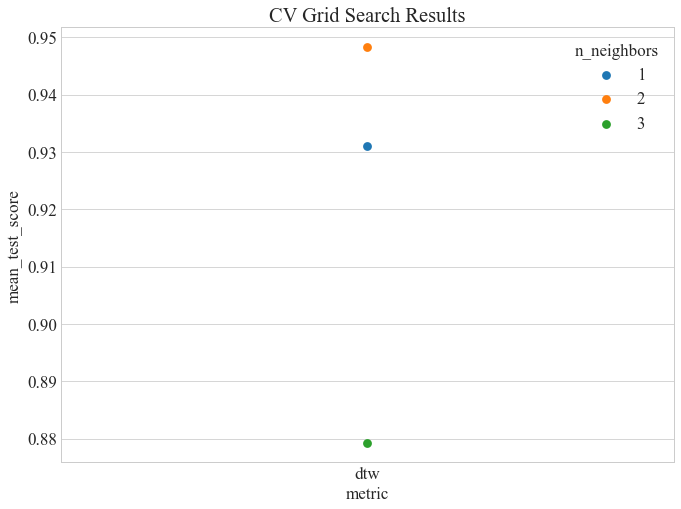

In [12]:
fig = plot_cv_results(gsearch.cv_results_, 'metric', 'n_neighbors')